In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('ecommerce_recommendation_dataset.csv')
df.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity
0,78517,1645,Books,842.23,2,155,24,Other,Urban,False,...,0.13,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54
1,52887,100,Books,253.76,3,331,43,Other,Suburban,False,...,0.02,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77
2,59395,585,Books,483.65,2,236,64,Female,Rural,True,...,1.55,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14
3,54739,3774,Groceries,459.37,2,227,34,Female,Urban,False,...,1.41,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18
4,42723,2119,Groceries,150.11,2,214,51,Female,Urban,True,...,1.29,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66


In [3]:
# check for duplicate data
df.duplicated().sum()

0

In [4]:
# check for missing/ empty or null data

df.isnull().sum()

# if you get null data, check what is the percentage of the null data, this is to remove the corresponding values or replace with mean or median values

user_id                    0
product_id                 0
category                   0
price                      0
rating                     0
review_count               0
user_age                   0
user_gender                0
user_location              0
purchase_history           0
time_on_page               0
add_to_cart_count          0
search_keywords            0
discount_applied           0
user_membership            0
user_browser               0
user_device                0
purchase_time              0
session_duration           0
clicks_on_ads              0
page_views                 0
referral_source            0
wishlist_additions         0
cart_abandonment_rate      0
average_spent              0
user_income                0
user_education             0
user_marital_status        0
product_availability       0
stock_status               0
product_return_rate        0
product_color              0
product_size               0
is_top_seller              0
discount_perce

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  60000 non-null  int64  
 1   product_id               60000 non-null  int64  
 2   category                 60000 non-null  object 
 3   price                    60000 non-null  float64
 4   rating                   60000 non-null  int64  
 5   review_count             60000 non-null  int64  
 6   user_age                 60000 non-null  int64  
 7   user_gender              60000 non-null  object 
 8   user_location            60000 non-null  object 
 9   purchase_history         60000 non-null  bool   
 10  time_on_page             60000 non-null  float64
 11  add_to_cart_count        60000 non-null  int64  
 12  search_keywords          60000 non-null  object 
 13  discount_applied         60000 non-null  bool   
 14  user_membership       

In [6]:
# Finding the unique values in the given columns

for i in df.columns:
    print("********************************", i ,  "********************************")
    print()
    print(set(df[i].tolist()))
    print()

******************************** user_id ********************************

{1, 4, 9, 11, 13, 15, 16, 17, 18, 21, 22, 23, 25, 26, 27, 32, 33, 37, 39, 45, 49, 55, 56, 58, 61, 64, 66, 68, 69, 73, 76, 77, 78, 79, 83, 84, 87, 89, 90, 92, 93, 94, 95, 100, 101, 105, 107, 111, 112, 113, 119, 120, 121, 122, 125, 127, 128, 130, 132, 134, 141, 142, 145, 146, 147, 149, 151, 152, 155, 158, 159, 160, 168, 171, 174, 176, 177, 178, 179, 180, 181, 182, 183, 188, 189, 192, 193, 194, 196, 198, 201, 204, 207, 208, 210, 211, 214, 216, 217, 219, 220, 221, 222, 224, 228, 229, 231, 232, 233, 237, 240, 242, 243, 246, 249, 251, 253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 268, 272, 280, 281, 282, 286, 292, 296, 298, 300, 304, 305, 306, 307, 308, 311, 315, 317, 318, 319, 320, 322, 323, 324, 327, 329, 330, 332, 335, 338, 343, 344, 345, 347, 350, 351, 352, 354, 357, 362, 364, 365, 366, 367, 368, 373, 376, 380, 381, 389, 393, 396, 399, 404, 406, 408, 410, 411, 412, 413, 415, 416, 418, 419, 422, 423, 

## High-Impact Features (Strongest Indicators)
- To perform the classification task i.e., to decide whether the user purchases the data or not, yes or no labels are required in the dataset.
- The dataset do not have labels. First task is to create labels
- For this, initially visualize or study the dataset

- This is done by considering the parameters that are deciding factors for purchasing the product
#### The below features have direct influence on purchase probability.
Price,
rating & review_count,
purchase_history,
time_on_page,
add_to_cart_count,
discount_applied,
session_duration,
page_views,
wishlist_additions,
cart_abandonment_rate,
product_availability,
stock_status,
is_top_seller,
discount_percentage,
time_to_purchase,
time_of_day & day_of_week,
coupon_used

#### But if we choose all these features, the data is imbalanced with all the labels as 1, so all these features are not considered
#### After multiple considerations and imposing more restrictions on the data, a balanced labeled data is obtained

In [7]:
data = df
data['purchase_label'] = np.where(
    (
        (data['session_duration'] >= 90) &  
        (data['page_views'] >= 2) &  
        (data['wishlist_additions'] > 2) &  
        (data['add_to_cart_count'] > 1) &  
        (data['discount_percentage'] >= 3) &  
        (data['coupon_used'] == True) &  
        (data['product_availability'].isin(["In Stock", "Pre-order"]))
    ), 1, 0  
)

print(data['purchase_label'].value_counts())


purchase_label
0    47614
1    12386
Name: count, dtype: int64


In [8]:
data.to_csv("recom_purchase_data.csv", index=False)

In [9]:
df_label = pd.read_csv("recom_purchase_data.csv")
df_label.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity,purchase_label
0,78517,1645,Books,842.23,2,155,24,Other,Urban,False,...,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54,0
1,52887,100,Books,253.76,3,331,43,Other,Suburban,False,...,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77,0
2,59395,585,Books,483.65,2,236,64,Female,Rural,True,...,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14,0
3,54739,3774,Groceries,459.37,2,227,34,Female,Urban,False,...,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18,0
4,42723,2119,Groceries,150.11,2,214,51,Female,Urban,True,...,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66,0


In [11]:
# Identify categorical columns
categorical_cols = df_label.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
df_label_encode = df_label
le = LabelEncoder()
# Apply Label Encoding
for col in categorical_cols:
    df_label_encode[col] = le.fit_transform(df_label_encode[col])  

df_label_encode.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity,purchase_label
0,78517,1645,0,842.23,2,155,24,2,2,False,...,-0.28,0.68,0.04,3,4,2,2,False,0.54,0
1,52887,100,0,253.76,3,331,43,2,1,False,...,0.28,0.11,0.89,2,2,2,2,False,0.77,0
2,59395,585,0,483.65,2,236,64,0,0,True,...,0.23,0.35,0.99,1,5,0,2,False,0.14,0
3,54739,3774,4,459.37,2,227,34,0,2,False,...,0.93,0.73,0.16,0,5,1,1,False,0.18,0
4,42723,2119,4,150.11,2,214,51,0,2,True,...,0.11,0.26,0.17,3,6,1,3,False,0.66,0


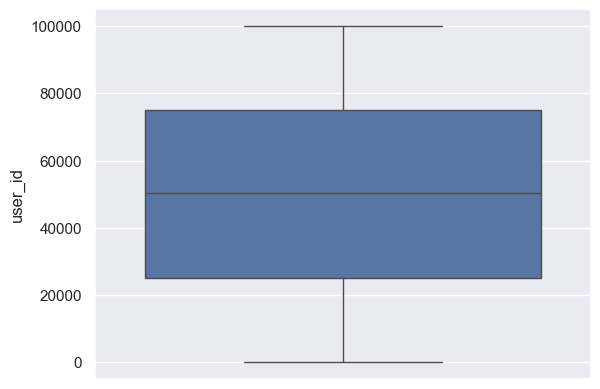

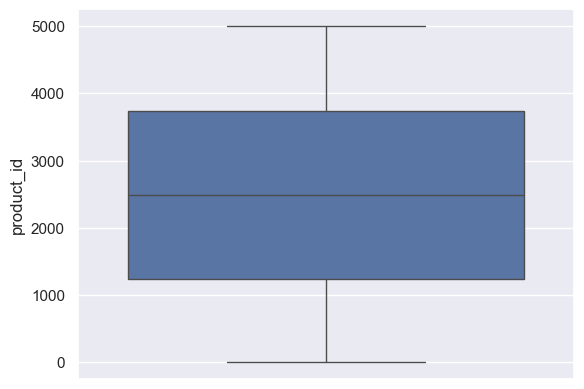

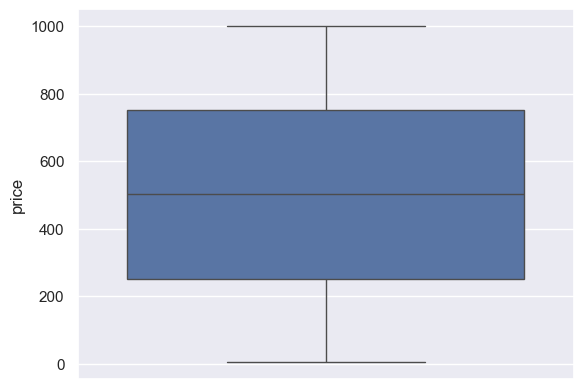

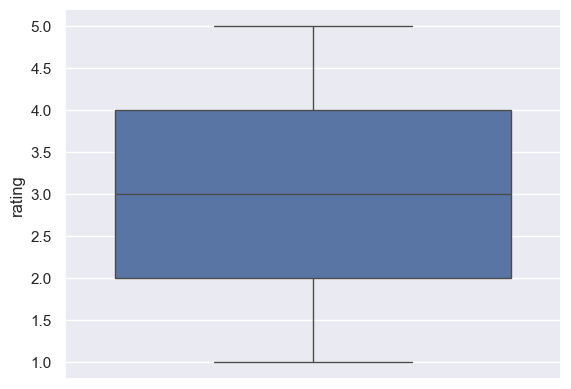

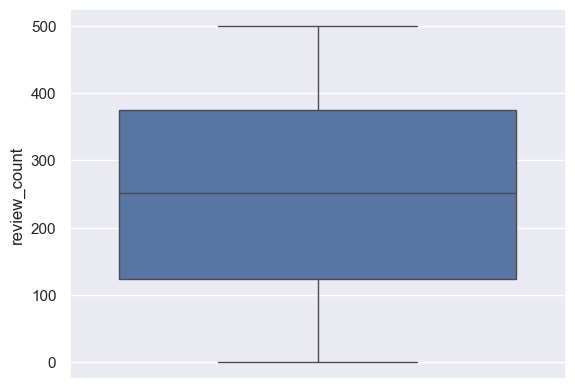

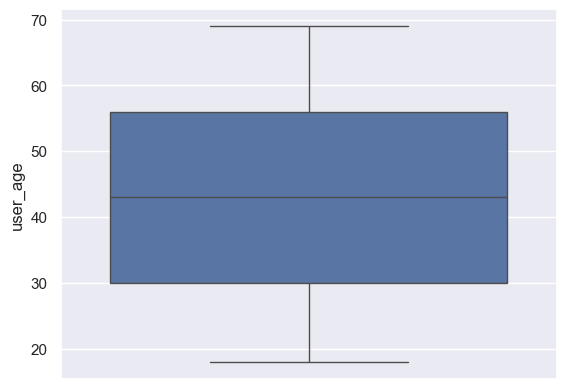

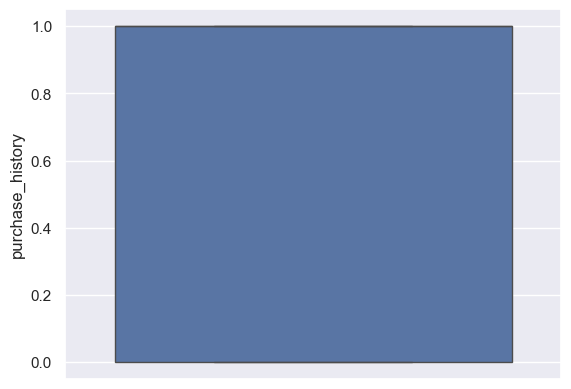

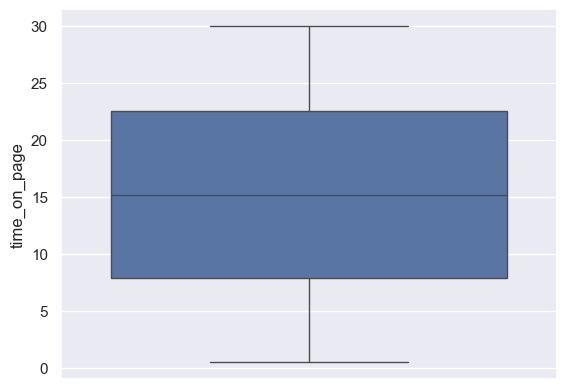

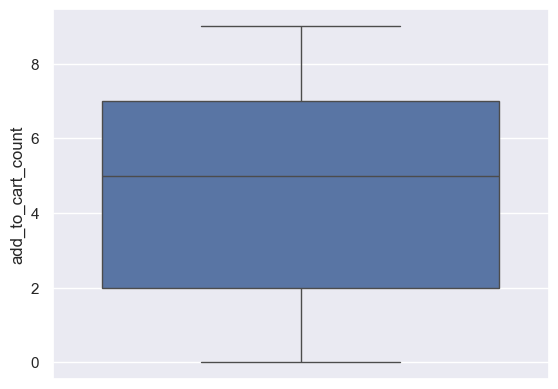

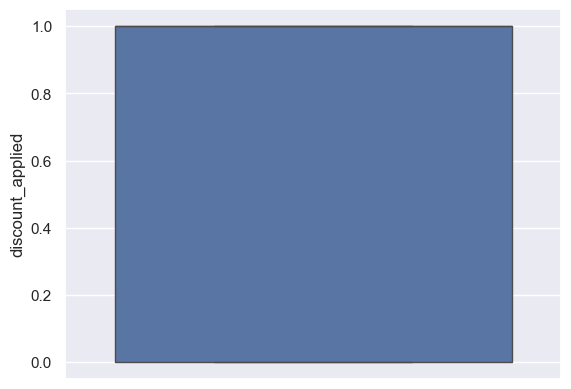

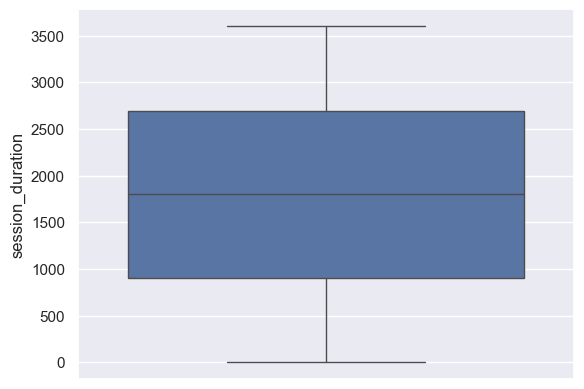

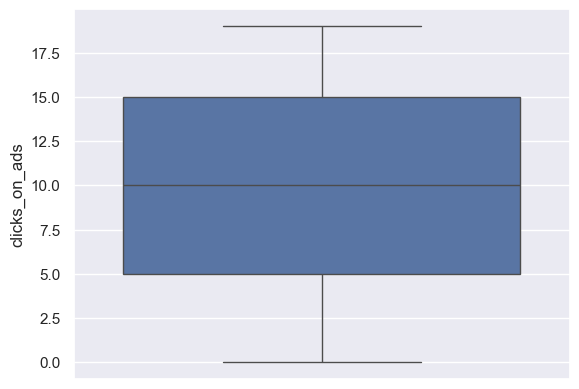

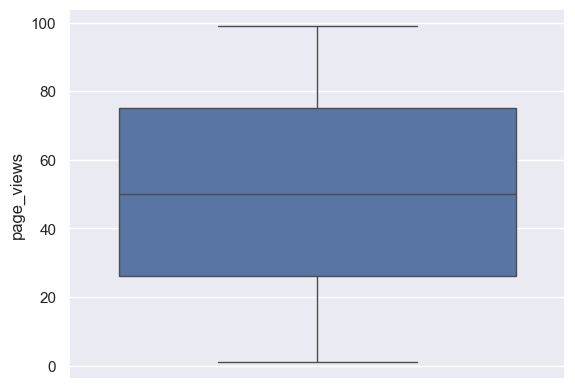

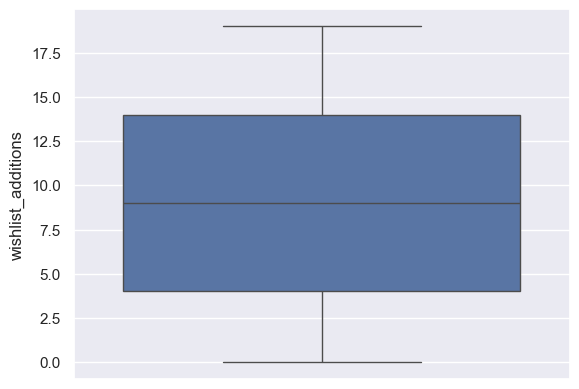

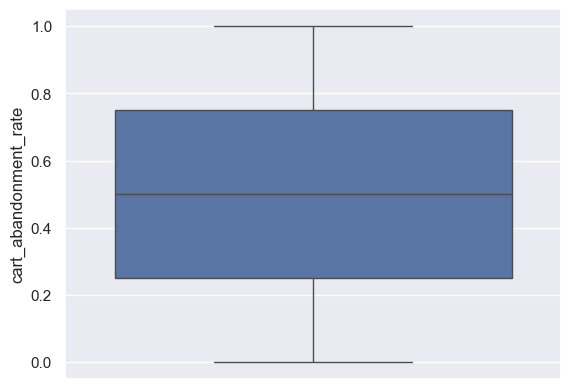

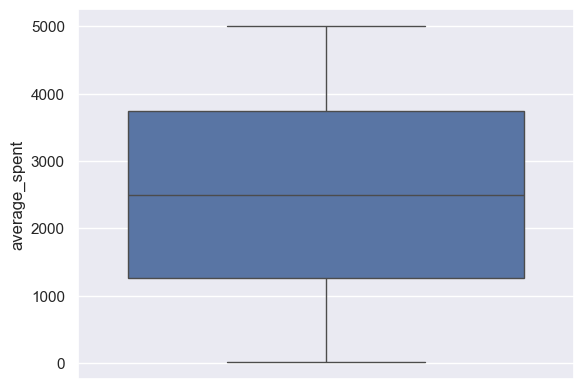

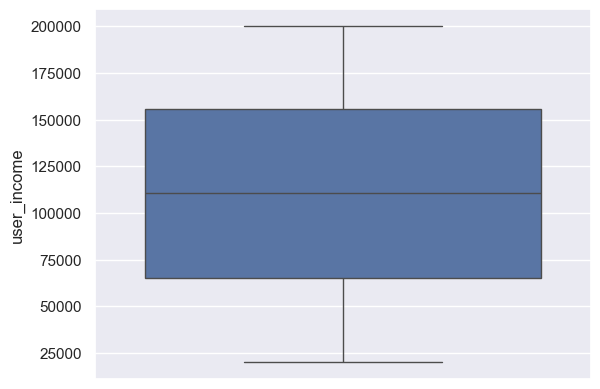

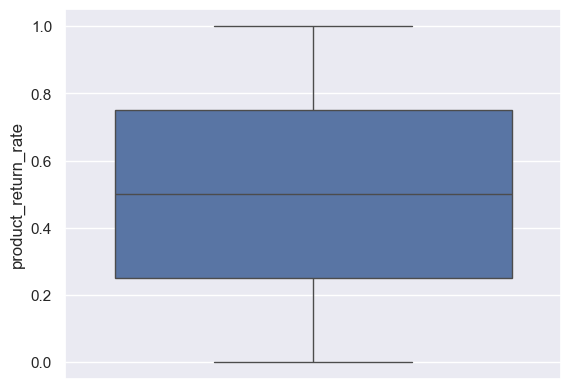

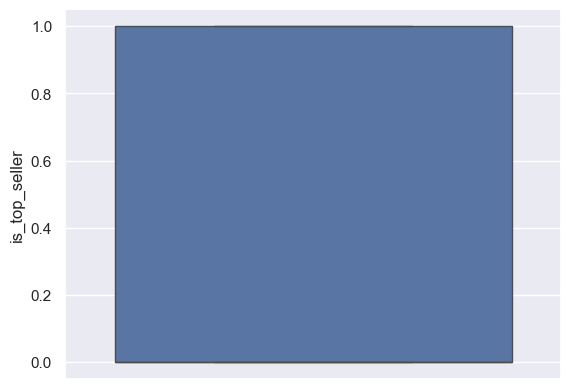

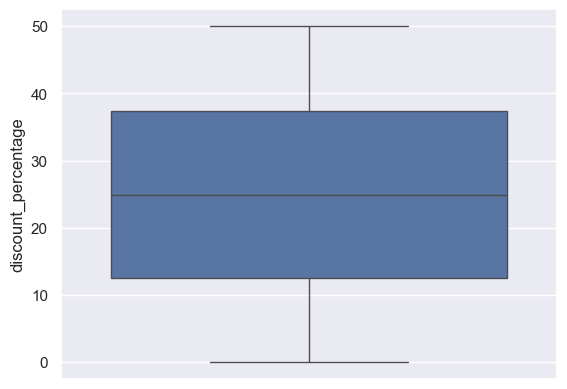

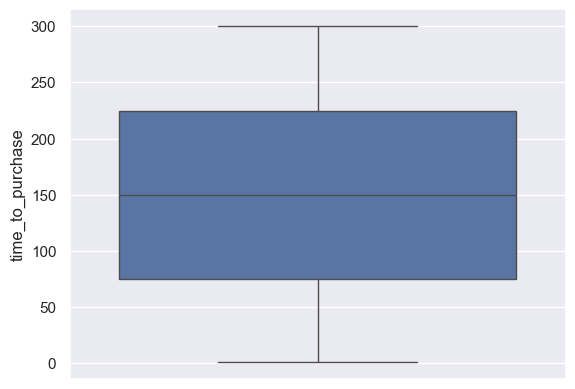

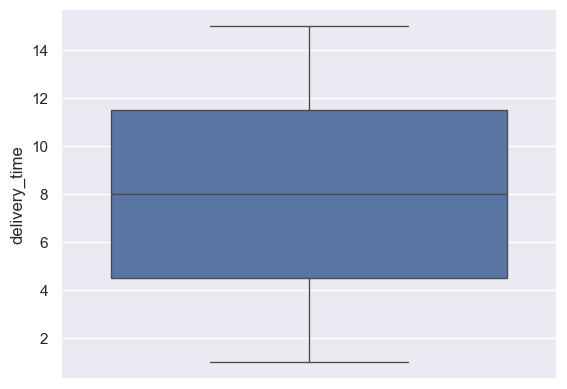

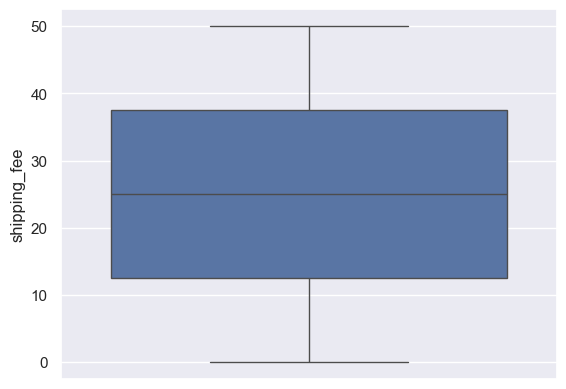

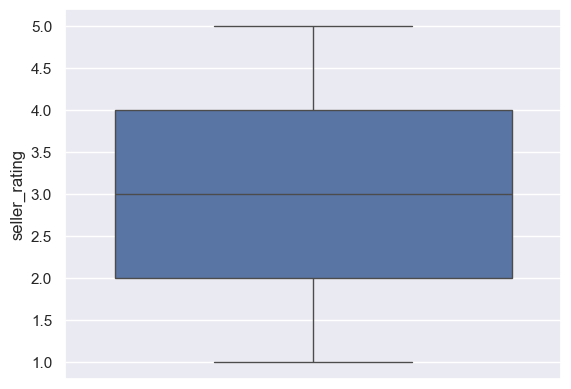

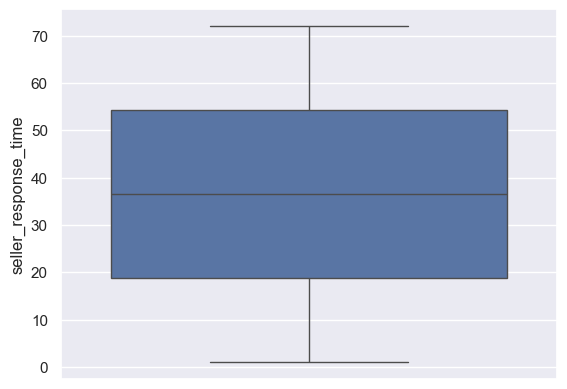

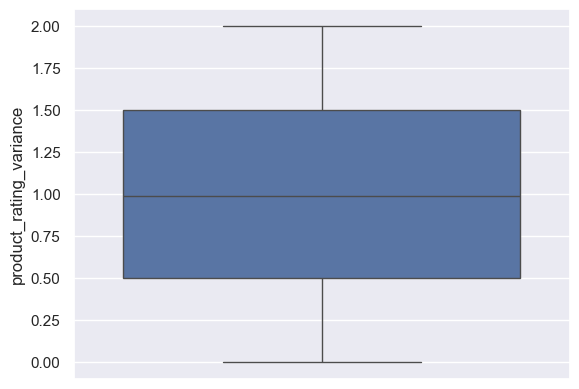

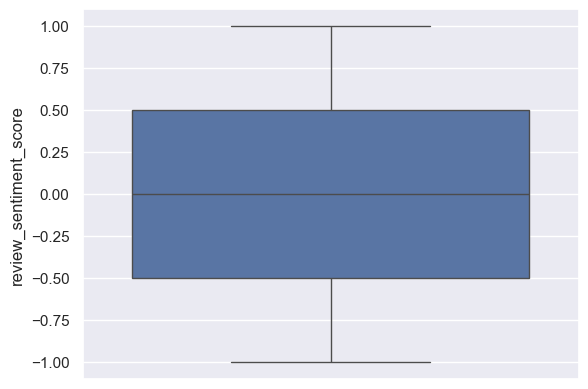

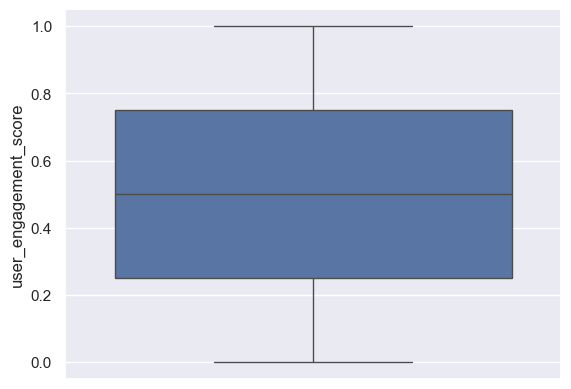

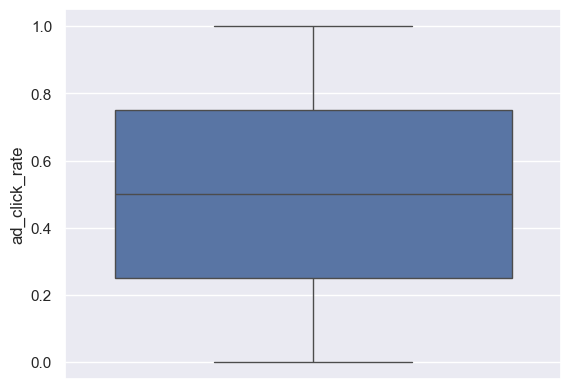

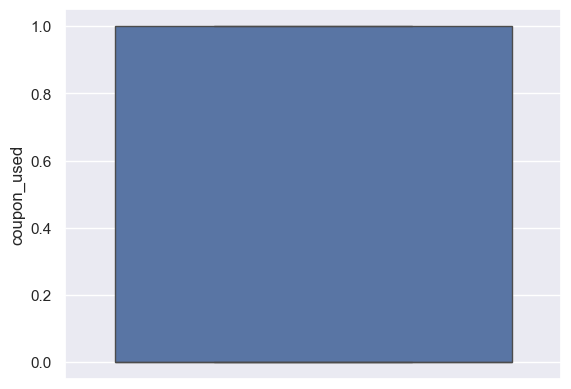

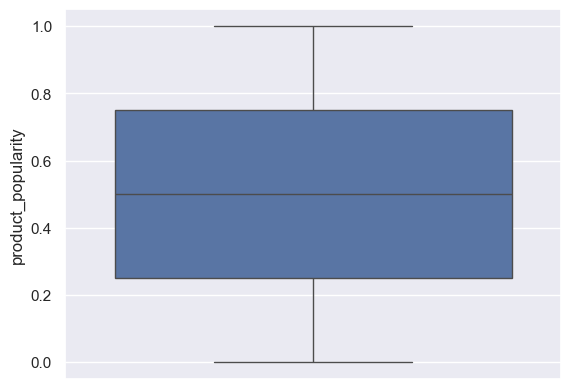

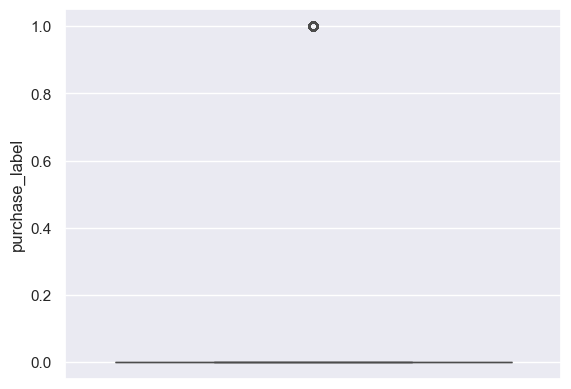

In [12]:
# checking outlier
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

### As there are no outliers in the data features, there is no need for feature optimization

# Using label encoding

In [13]:
# split the data into x and y
x = df_label_encode.iloc[:,:-1]
y = df_label_encode.iloc[:,-1]

In [14]:
# split the data into training and testing for building the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [17]:
# logistic regression
logit = LogisticRegression()
lr = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
# Print Classification Accuracy
print(f"Accuracy: {accuracy_lr:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.7936

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9523
           1       0.00      0.00      0.00      2477

    accuracy                           0.79     12000
   macro avg       0.40      0.50      0.44     12000
weighted avg       0.63      0.79      0.70     12000


Confusion Matrix:
[[9523    0]
 [2477    0]]


In [18]:
# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
# Print Classification Accuracy
print(f"Accuracy: {accuracy_dt:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9523
           1       1.00      1.00      1.00      2477

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


Confusion Matrix:
[[9523    0]
 [   0 2477]]


In [19]:
# BaggingClassifier
bagging = BaggingClassifier()
bg = bagging.fit(x_train, y_train)
y_pred_bg = bagging.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_bg:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bg))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bg))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9523
           1       1.00      1.00      1.00      2477

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


Confusion Matrix:
[[9523    0]
 [   0 2477]]


In [20]:
# RandomForestClassifier
rforest = RandomForestClassifier()
rf = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_rf:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9523
           1       1.00      1.00      1.00      2477

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


Confusion Matrix:
[[9523    0]
 [   1 2476]]


In [21]:
# AdaBoostClassifier
adaboost = AdaBoostClassifier()
ada = adaboost.fit(x_train, y_train)
y_pred_ada = adaboost.predict(x_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_ada:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9523
           1       1.00      1.00      1.00      2477

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


Confusion Matrix:
[[9523    0]
 [   0 2477]]


In [22]:
# GradientBoostingClassifier
gdboost = GradientBoostingClassifier()
gd = gdboost.fit(x_train, y_train)
y_pred_gd = gdboost.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_gd:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gd))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gd))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9523
           1       1.00      1.00      1.00      2477

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


Confusion Matrix:
[[9523    0]
 [   0 2477]]


In [23]:
# XGBClassifier
xgboost = XGBClassifier()
xg = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_xg:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xg))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xg))

Accuracy: 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9523
           1       1.00      1.00      1.00      2477

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


Confusion Matrix:
[[9521    2]
 [   8 2469]]


In [24]:
# SVC
svm = SVC()
sv = svm.fit(x_train, y_train)
y_pred_sv = svm.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_sv:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sv))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_sv))

Accuracy: 0.7936

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9523
           1       0.00      0.00      0.00      2477

    accuracy                           0.79     12000
   macro avg       0.40      0.50      0.44     12000
weighted avg       0.63      0.79      0.70     12000


Confusion Matrix:
[[9523    0]
 [2477    0]]


In [25]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_kn = knn.predict(x_test)
accuracy_kn = accuracy_score(y_test, y_pred_kn)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_kn:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_kn))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_kn))

Accuracy: 0.7552

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      9523
           1       0.21      0.06      0.10      2477

    accuracy                           0.76     12000
   macro avg       0.50      0.50      0.48     12000
weighted avg       0.67      0.76      0.70     12000


Confusion Matrix:
[[8902  621]
 [2316  161]]


In [26]:
# GaussianNB
gnb = GaussianNB()
gn = gnb.fit(x_train, y_train)
y_pred_gn = gnb.predict(x_test)
accuracy_gn = accuracy_score(y_test, y_pred_gn)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_gn:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gn))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gn))

Accuracy: 0.7936

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9523
           1       0.00      0.00      0.00      2477

    accuracy                           0.79     12000
   macro avg       0.40      0.50      0.44     12000
weighted avg       0.63      0.79      0.70     12000


Confusion Matrix:
[[9523    0]
 [2477    0]]


In [27]:
# BernoulliNB
bnb = BernoulliNB()
bn = bnb.fit(x_train, y_train)
y_pred_bn = bnb.predict(x_test)
accuracy_bn = accuracy_score(y_test, y_pred_bn)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_bn:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bn))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bn))

Accuracy: 0.8528

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      9523
           1       0.71      0.49      0.58      2477

    accuracy                           0.85     12000
   macro avg       0.79      0.72      0.74     12000
weighted avg       0.84      0.85      0.84     12000


Confusion Matrix:
[[9032  491]
 [1275 1202]]


In [28]:
# Voting classifier - combining all model together
voting = VotingClassifier(estimators = [('lr', lr),('dt', dt),('bg', bg), ('rf', rf), ('ada', ada),('gd', gd),
                                        ('xg', xg),('sv', sv),('kn', kn), ('gn', gn),('bn', bn)], voting='hard')

model_voting = voting.fit(x_train, y_train)
y_pred_voting = voting.predict(x_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Print Classification Accuracy
print(f"Accuracy: {accuracy_voting:.4f}")
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))

Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9523
           1       1.00      1.00      1.00      2477

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


Confusion Matrix:
[[9523    0]
 [   3 2474]]


   Model Name  Accuracy
0    LogitReg  0.793583
1          DT  1.000000
2     Bagging  1.000000
3          RF  0.999917
4    AdaBoost  1.000000
5     GDBoost  1.000000
6     XGBoost  0.999167
7         SVC  0.793583
8         KNN  0.755250
9         GNB  0.793583
10        BNB  0.852833
11     Voting  0.999750
Axes(0.125,0.11;0.775x0.77)


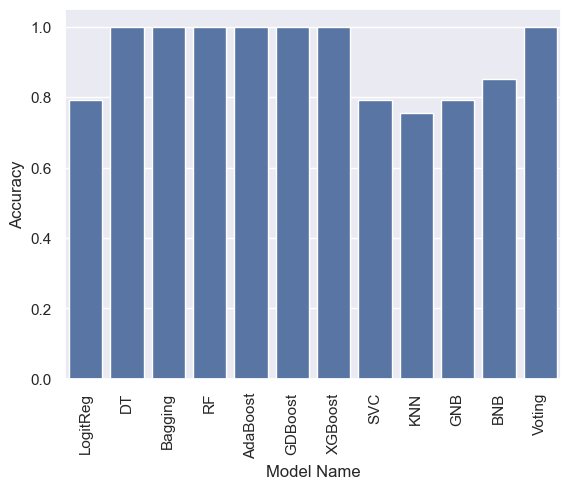

In [29]:

list1 = ['LogitReg','DT','Bagging','RF','AdaBoost','GDBoost','XGBoost','SVC','KNN','GNB','BNB','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_bg,accuracy_rf,accuracy_ada, accuracy_gd, accuracy_xg,
         accuracy_sv, accuracy_kn, accuracy_gn, accuracy_bn, accuracy_voting]
list3 = [logit,dtree,bagging,rforest,adaboost,gdboost,xgboost, svm,knn,gnb,bnb,model_voting]


df_accuracy = pd.DataFrame({'Model Name':list1, 'Accuracy':list2})
print(df_accuracy)
charts = sns.barplot(x='Model Name', y='Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)